In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('Crime_FIR_Dataset.csv')
data=pd.read_csv('Crime_FIR_Dataset.csv')
data

,Timestamp,City Name,Latitude,Longitude,FIR No.,Crime Type,Date Crime,Time Crime,Gender,Age,SafetyIndex
0,2019/12/10 12:52:02 PM GMT+5:30,Andheri,19.115154,72.866151,850,Murder,23-11-2019,15:00,Male,72,2.0
1,2019/12/10 12:56:40 PM GMT+5:30,Andheri,19.119719,72.847316,839,Theft,19-11-2019,18:30,Male,39,2.0
2,2019/12/10 12:59:08 PM GMT+5:30,Andheri,19.119415,72.847059,838,Theft,19-11-2019,16:49,Male,57,2.0
3,2019/12/10 1:03:00 PM GMT+5:30,Santacruz,19.082584,72.838128,575,Theft,20-11-2019,20:00,Female,30,2.7
4,2019/12/10 1:04:19 PM GMT+5:30,Andheri,19.116373,72.853582,835,Murder,18-11-2019,11:21,Male,35,2.0
...,...,...,...,...,...,...,...,...,...,...,...
208,2019/12/13 8:19:38 PM GMT+5:30,RCF,19.043009,72.895914,431,Robbery,19-10-2019,11:30,Male,32,3.5
209,2019/12/13 8:21:08 PM GMT+5:30,RCF,19.041386,72.908102,425,Theft,16-10-2019,11:41,Male,35,3.0
210,2019/12/13 8:22:30 PM GMT+5:30,RCF,19.040413,72.902781,425,Theft,16-10-2019,08:30,Male,35,3.0
211,2019/12/13 8:24:10 PM GMT+5:30,RCF,19.036261,72.890221,410,Robbery,08-10-2019,17:35,Female,23,3.0


In [3]:
data['Date-Time'] = data['Date Crime'] + " " + data['Time Crime']
data['Date-Time'] = pd.to_datetime(data['Date-Time'],  errors='coerce')

Column = data['Date-Time']

db=pd.DataFrame({
    "year": Column.dt.year, 
    "month": Column.dt.month, 
    "day": Column.dt.day, 
    "hour": Column.dt.hour, 
    "minute": Column.dt.minute, 
    "weekday": Column.dt.weekday
})

db['Robbery'] = data.apply(lambda x: 1 if x["Crime Type"]=="Robbery" else 0, axis=1)
db['Theft'] = data.apply(lambda x: 1 if x["Crime Type"]=="Theft" else 0, axis=1)
db['Murder'] = data.apply(lambda x: 1 if x["Crime Type"]=="Murder" else 0, axis=1)

dataset1=dataset.drop('Timestamp',axis=1)
data1=pd.concat([db,dataset1["City Name"], dataset1["Latitude"],dataset1["Longitude"],dataset1["Crime Type"],dataset1["SafetyIndex"]],axis=1)
data1.dropna(inplace=True)
data1

,year,month,day,hour,minute,weekday,Robbery,Theft,Murder,City Name,Latitude,Longitude,Crime Type,SafetyIndex
0,2019,11,23,15,0,5,0,0,1,Andheri,19.115154,72.866151,Murder,2.0
1,2019,11,19,18,30,1,0,1,0,Andheri,19.119719,72.847316,Theft,2.0
2,2019,11,19,16,49,1,0,1,0,Andheri,19.119415,72.847059,Theft,2.0
3,2019,11,20,20,0,2,0,1,0,Santacruz,19.082584,72.838128,Theft,2.7
4,2019,11,18,11,21,0,0,0,1,Andheri,19.116373,72.853582,Murder,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2019,10,19,11,30,5,1,0,0,RCF,19.043009,72.895914,Robbery,3.5
209,2019,10,16,11,41,2,0,1,0,RCF,19.041386,72.908102,Theft,3.0
210,2019,10,16,8,30,2,0,1,0,RCF,19.040413,72.902781,Theft,3.0
211,2019,8,10,17,35,5,1,0,0,RCF,19.036261,72.890221,Robbery,3.0


In [4]:
#data1[data1["City Name"]=="Andheri"].count()["Crime Type"]
#data1.groupby('Crime Type').size()
#data1[data1["City Name"]=="RCF"].groupby('Crime Type').size()
CityCrime=pd.DataFrame({
    "City": ["Andheri", "Santacruz", "Sion", "Vakola", "Bandra", "BK Complex", "Byculla", "Vile Parle", "Dadar", "Juhu", "Kurla", "Wadala", "Mulund", "Powai", "RCF"],
    "Murder": [5,0,0,0,1,1,0,0,2,0,4,1,4,2,2],
    "Robbery": [16,7,2,3,11,0,2,1,9,2,4,2,2,4,3],
    "Theft": [29,13,2,7,16,1,5,5,8,7,8,5,3,8,5],
    "SafetyIndex": [2.0, 2.7, 3.425, 2.9, 2.5, 2.3, 2.814286, 3.05, 2.926316, 3.5, 2.447059, 3.2, 2.633333, 2.914286, 2.9]
})
CityCrime["CrimeCount"] = CityCrime["Murder"]+ CityCrime["Robbery"] + CityCrime["Theft"]
CityCrime

,City,Murder,Robbery,Theft,SafetyIndex,CrimeCount
0,Andheri,5,16,29,2.000000,50
1,Santacruz,0,7,13,2.700000,20
2,Sion,0,2,2,3.425000,4
3,Vakola,0,3,7,2.900000,10
4,Bandra,1,11,16,2.500000,28
5,BK Complex,1,0,1,2.300000,2
6,Byculla,0,2,5,2.814286,7
7,Vile Parle,0,1,5,3.050000,6
8,Dadar,2,9,8,2.926316,19
9,Juhu,0,2,7,3.500000,9


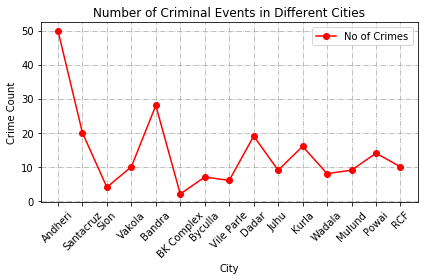

In [14]:
CityName = CityCrime["City"]
CrimeCount = CityCrime["CrimeCount"]
plt.plot(CityName, CrimeCount, label="No of Crimes", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="-.")
plt.title("Number of Criminal Events in Different Cities")
plt.tight_layout()
plt.savefig("CrimeEvents_Cities.jpeg", dpi=500)
plt.show()

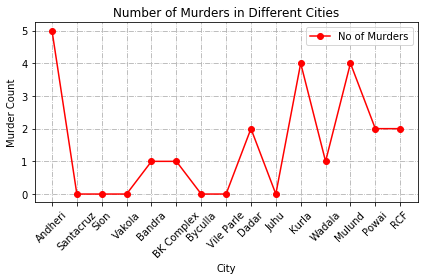

In [15]:
CityName = CityCrime["City"]
MurderCount = CityCrime["Murder"]
plt.plot(CityName, MurderCount, label="No of Murders", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Murder Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="-.")
plt.title("Number of Murders in Different Cities")
plt.tight_layout()
plt.savefig("MurderPlot.jpeg", dpi=500)
plt.show()

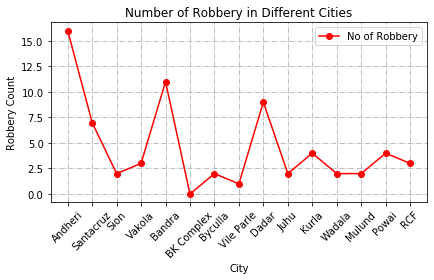

In [16]:
CityName = CityCrime["City"]
RobberyCount = CityCrime["Robbery"]
plt.plot(CityName, RobberyCount, label="No of Robbery", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Robbery Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="-.")
plt.title("Number of Robbery in Different Cities")
plt.tight_layout()
plt.savefig("RobberyPlot.jpeg", dpi=500)
plt.show()

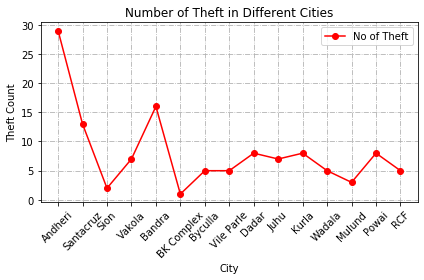

In [17]:
CityName = CityCrime["City"]
TheftCount = CityCrime["Theft"]
plt.plot(CityName, TheftCount, label="No of Theft", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Theft Count")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="-.")
plt.title("Number of Theft in Different Cities")
plt.tight_layout()
plt.savefig("TheftPlot.jpeg", dpi=500)
plt.show()

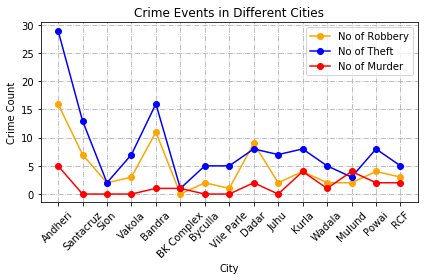

In [18]:
CityName = CityCrime["City"]
TheftCount = CityCrime["Theft"]
plt.plot(CityName, RobberyCount, label="No of Robbery", color="orange", marker="o")
plt.plot(CityName, TheftCount, label="No of Theft", color="b", marker="o")
plt.plot(CityName, MurderCount, label="No of Murder", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Crime Events in Different Cities")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("AllCrimeEventsPlot.jpeg", dpi=500)
plt.show()

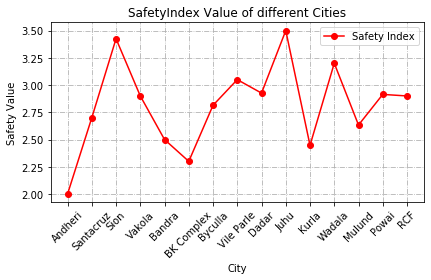

In [19]:
CityName = CityCrime["City"]
SafetyIndex = CityCrime["SafetyIndex"]
plt.plot(CityName, SafetyIndex, label="Safety Index", color="r", marker="o")
plt.xlabel("City")
plt.ylabel("Safety Value")
plt.xticks(rotation=45)
plt.legend()
plt.title("SafetyIndex Value of different Cities")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("SafetIndexPlot.jpeg", dpi=500)
plt.show()

In [20]:
#data1[data1["City Name"]=="Andheri"].count()["Crime Type"]
#data1.groupby('Crime Type').size()
#data1.groupby('hour').size()

In [21]:
EightIntervals = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [28, 7, 10, 17, 31, 50, 31, 39]
})
EightIntervals

,Time Of Day,Crime Count
0,0-3,28
1,3-6,7
2,6-9,10
3,9-12,17
4,12-15,31
5,15-18,50
6,18-21,31
7,21-24,39


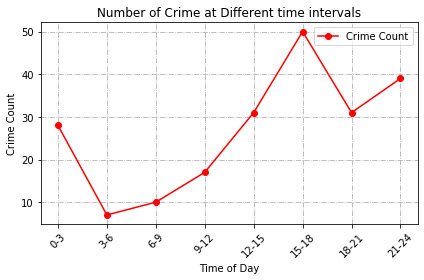

In [22]:
TimeOfDay = EightIntervals["Time Of Day"]
CrimeCount = EightIntervals["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crime at Different time intervals")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("TimePlot.jpeg", dpi=500)
plt.show()

In [23]:
#data1[data1["City Name"]=="RCF"].groupby('hour').size()

In [24]:
Time_Andheri = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [6, 0, 2, 3, 8, 14, 7, 10]
})

Time_Santacruz = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [2, 1, 0, 2, 2, 8, 2, 3]
})

Time_Sion = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [0, 0, 0, 1, 1, 1, 1, 0]
})

Time_Vakola = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [1, 1, 3, 0, 1, 0, 2, 2]
})

Time_Bandra = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [3, 2, 1, 2, 4, 6, 5, 5]
})

Time_BK_Complex = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [1, 0, 0, 0, 0, 0, 0, 1]
})

Time_Byculla = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [0, 0, 1, 2, 2, 0, 2, 0]
})

Time_Vile_Parle = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [3, 1, 0, 0, 0, 0, 2, 0]
})

Time_Dadar = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [1, 0, 1, 0, 3, 6, 5, 3]
})

Time_Juhu = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [2, 0, 0, 0, 1, 0, 1, 5]
})

Time_Kurla = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [2, 0, 1, 1, 1, 5, 2, 4]
})

Time_Wadala = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [2, 0, 0, 2, 0, 3, 0, 1]
})

Time_Mulund = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [1, 1, 0, 1, 3, 2, 0, 1]
})

Time_Powai = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [4, 1, 0, 0, 3, 2, 1, 3]
})

Time_RCF = pd.DataFrame({
    "Time Of Day": ["0-3", "3-6", "6-9", "9-12", "12-15", "15-18", "18-21", "21-24"],
    "Crime Count": [0, 0, 1, 3, 2, 3, 1, 0]
})

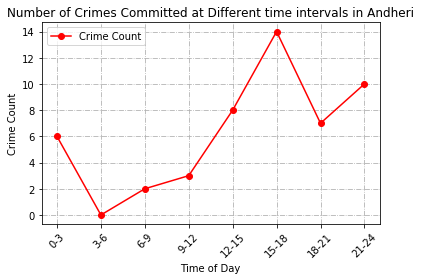

In [25]:
TimeOfDay = Time_Andheri["Time Of Day"]
CrimeCount = Time_Andheri["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Andheri")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("AndheriTimePlot.jpeg", dpi=500)
plt.show()

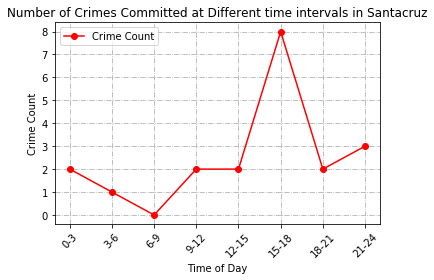

In [26]:
TimeOfDay = Time_Santacruz["Time Of Day"]
CrimeCount = Time_Santacruz["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Santacruz")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("SantacruzTimePlot.jpeg", dpi=500)
plt.show()

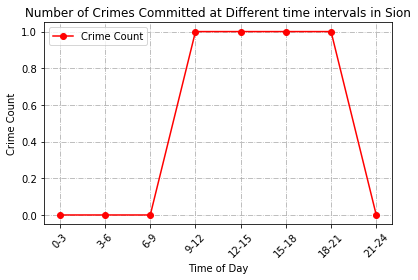

In [27]:
TimeOfDay = Time_Sion["Time Of Day"]
CrimeCount = Time_Sion["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Sion")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("SionTimePlot.jpeg", dpi=500)
plt.show()

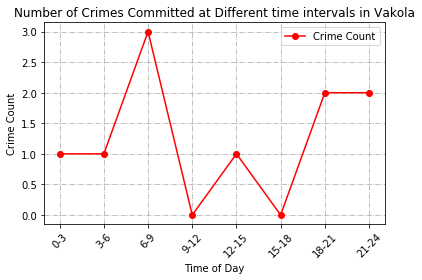

In [30]:
TimeOfDay = Time_Vakola["Time Of Day"]
CrimeCount = Time_Vakola["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Vakola")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("VakolaTimePlot.jpeg", dpi=500)
plt.show()

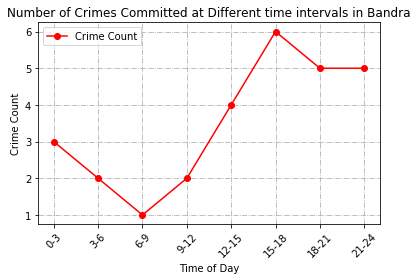

In [31]:
TimeOfDay = Time_Bandra["Time Of Day"]
CrimeCount = Time_Bandra["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Bandra")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("BandraTimePlot.jpeg", dpi=500)
plt.show()

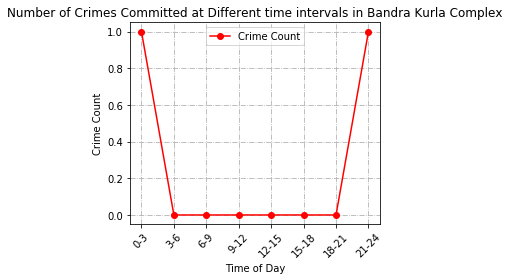

In [32]:
TimeOfDay = Time_BK_Complex["Time Of Day"]
CrimeCount = Time_BK_Complex["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Bandra Kurla Complex")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("Bandra-KurlaTimePlot.jpeg", dpi=500)
plt.show()

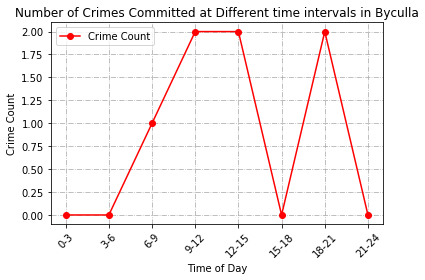

In [33]:
TimeOfDay = Time_Byculla["Time Of Day"]
CrimeCount = Time_Byculla["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Byculla")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("BycullaTimePlot.jpeg", dpi=500)
plt.show()

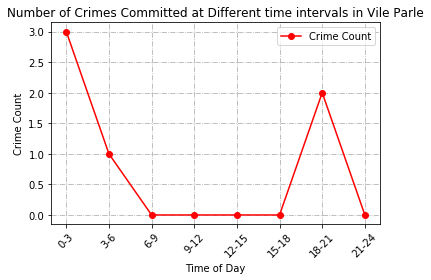

In [34]:
TimeOfDay = Time_Vile_Parle["Time Of Day"]
CrimeCount = Time_Vile_Parle["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Vile Parle")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("VileParleTimePlot.jpeg", dpi=500)
plt.show()

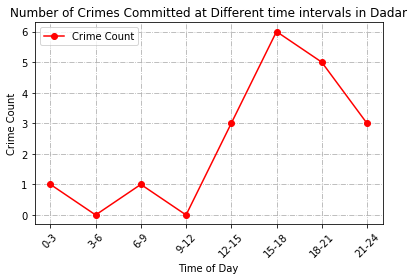

In [35]:
TimeOfDay = Time_Dadar["Time Of Day"]
CrimeCount = Time_Dadar["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Dadar")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("DadarTimePlot.jpeg", dpi=500)
plt.show()

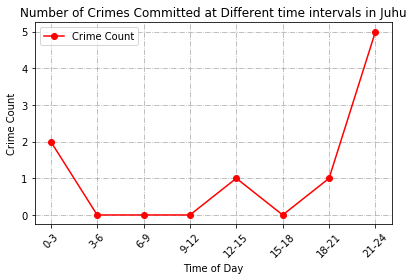

In [36]:
TimeOfDay = Time_Juhu["Time Of Day"]
CrimeCount = Time_Juhu["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Juhu")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("JuhuTimePlot.jpeg", dpi=500)
plt.show()

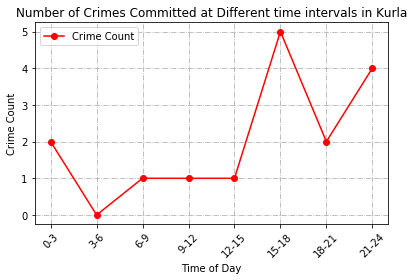

In [37]:
TimeOfDay = Time_Kurla["Time Of Day"]
CrimeCount = Time_Kurla["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Kurla")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("KurlaTimePlot.jpeg", dpi=500)
plt.show()

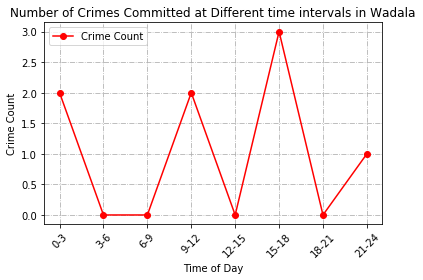

In [38]:
TimeOfDay = Time_Wadala["Time Of Day"]
CrimeCount = Time_Wadala["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Wadala")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("WadalaTimePlot.jpeg", dpi=500)
plt.show()

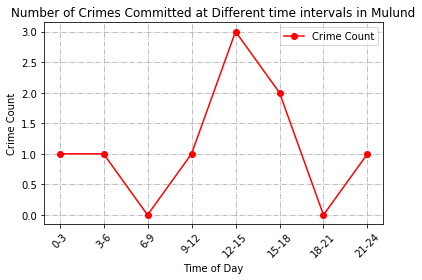

In [39]:
TimeOfDay = Time_Mulund["Time Of Day"]
CrimeCount = Time_Mulund["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Mulund")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("MulundTimePlot.jpeg", dpi=500)
plt.show()

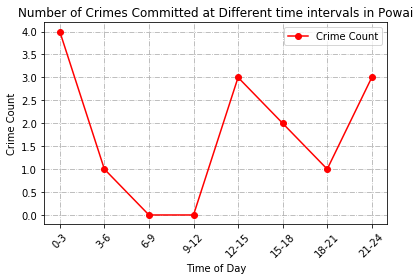

In [40]:
TimeOfDay = Time_Powai["Time Of Day"]
CrimeCount = Time_Powai["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in Powai")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("PowaiTimePlot.jpeg", dpi=500)
plt.show()

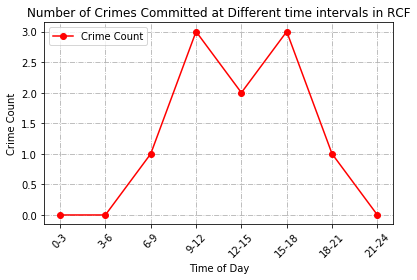

In [41]:
TimeOfDay = Time_RCF["Time Of Day"]
CrimeCount = Time_RCF["Crime Count"]
plt.plot(TimeOfDay, CrimeCount, label="Crime Count", color="r", marker="o")
plt.xlabel("Time of Day")
plt.ylabel("Crime Count")
plt.xticks(rotation=45)
plt.legend()
plt.title("Number of Crimes Committed at Different time intervals in RCF")
plt.grid(True, linestyle="-.")
plt.tight_layout()
plt.savefig("RCFTimePlot.jpeg", dpi=500)
plt.show()